# Import

In [1]:
%matplotlib inline
import os

import tensorflow as tf
import tensorflow.compat.v1 as tf
#tf.compat.v1.disable_eager_execution()
print(tf.__version__)

import numpy as np
import scipy.misc

import matplotlib
import matplotlib.pyplot as plt 

import time

2.7.0


In [2]:
# The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images 
# that are commonly used to train machine learning and computer vision algorithms

# generate original training and test data
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, 
# with 6000 images per class. 
# There are 50000 training images and 10000 test images.
img_size = 32
img_chan = 3
n_classes = 10

learning_rate = 0.05
#global_step = 
input_size = 32*32*3
output_size = 10


print('\nLoading CIFAR10')

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#x_train = np.reshape(x_train, [-1, img_size, img_size, img_chan])
#x_test = np.reshape(x_test, [-1, img_size, img_size, img_chan])

x_train = np.reshape(x_train, [-1, img_size*img_size*3])
x_train = x_train.astype(np.float32) / 255

x_test = np.reshape(x_test, [-1, img_size*img_size*3])
x_test = x_test.astype(np.float32) / 255

to_categorical = tf.keras.utils.to_categorical 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\nSpliting data')

ind = np.random.permutation(x_train.shape[0])
x_train, y_train = x_train[ind], y_train[ind] 

validatationPct = 0.1
n = int(x_train.shape[0] * (1-validatationPct))
x_valid = x_train[n:]
x_train = x_train[:n]
y_valid = y_train[n:]
y_train = y_train[:n] 

train_num_examples = x_train.shape[0]
valid_num_examples = x_valid.shape[0]
test_num_examples  = x_test.shape[0]

print(train_num_examples, valid_num_examples, test_num_examples)


Loading CIFAR10

Spliting data
45000 5000 10000


# Load Image

In [3]:
index = 1056

img = x_train[index]
label = y_train[index]

print('Label:', np.argmax(label))

Label: 1


# Plot with shape 32 x 32

Shape before: (3072,)
Shape after: (32, 32, 3)


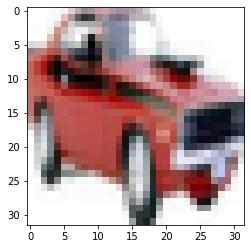

In [4]:
print('Shape before:', img.shape)
img = img.reshape(32, 32, 3)
#the image are stored as vector, need to convert in matrix in order to visualize it
print('Shape after:',img.shape)
plt.imshow(img)
plt.show()




# Max Pooling with Various Windows, 'same' padding

New Shape: (31, 31, 3)


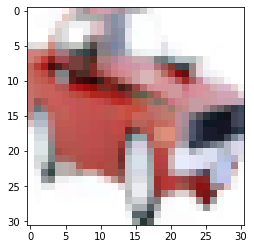

In [5]:
'''

p_max = tf.nn.pool(input=img.reshape(1,32,32,1,3), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2, 1],
    pooling_type="MAX",
    padding="VALID",
    strides=[2,2])

'''


p_max = tf.nn.pool(input=img.reshape(1,32,32,1,3), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2, 1],
    pooling_type="MAX",
    padding="VALID",
    strides=None)

#remove the first and last dimension added by the reshape
p_max = tf.squeeze(p_max, [0, 3])
print('New Shape:', p_max.shape)

plt.imshow(p_max)

# Average Pooling

New Shape: (32, 32, 3)


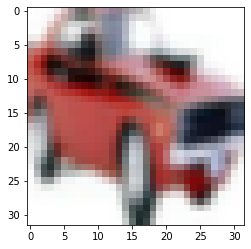

In [6]:
'''
p_avg = tf.nn.pool(input=img.reshape(1,32,32,1,3), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2],
    pooling_type="AVG",
    padding="SAME", 
    strides=[2,2])

'''


p_avg = tf.nn.pool(input=img.reshape(1,32,32,3,1), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2, 1],
    pooling_type="AVG",
    padding="SAME", 
    strides=None)

#remove the first and last dimension added by the reshape
p_avg = tf.squeeze(p_avg, [0, 4])
print('New Shape:', p_avg.shape)

plt.imshow(p_avg)